![SolidQ](https://www.solidq.com/wp-content/uploads/2015/06/Logo-SolidQ-Web.gif)
# Prediciendo el abandono de clientes


## Cómo leer ficheros de Drive en lugar de subirlos al entorno volátil de Colaboratory

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Tenemos un escenario en el que queremos medir el ratio de abandono (Churn Rate) de nuestros clientes de Telco. Es un concepto especialmente importante en negocios que están basados en suscripciones.

en nuestro conjunto de datos de ejemplo, cada ocurrencia representa un cliente de una compañía telefónica. Cada columna contiene atributos de ese cliente, como los cargos incurridos por servicio, tiempo de duración de su cuenta o si el cliente es todavía clinete o no. 

## Tarea 1: EDA y Preparación de Datos

### Importamos las clases y módulos necesarios

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Explorando los datos

In [0]:

df_abandonos = pd.read_csv("/content/gdrive/My Drive/Datos/TelcoChurn.csv" )
#df_abandonos = pd.read_csv("TelcoChurn.csv")

In [0]:
df_abandonos.head()
#tenemos 3333 observaciones, de ellas 483 tienen Churn = yes

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [0]:
#filtro = df_abandonos["Churn"]=="yes"
#df_abandonos.where(filtro, inplace = False).count()


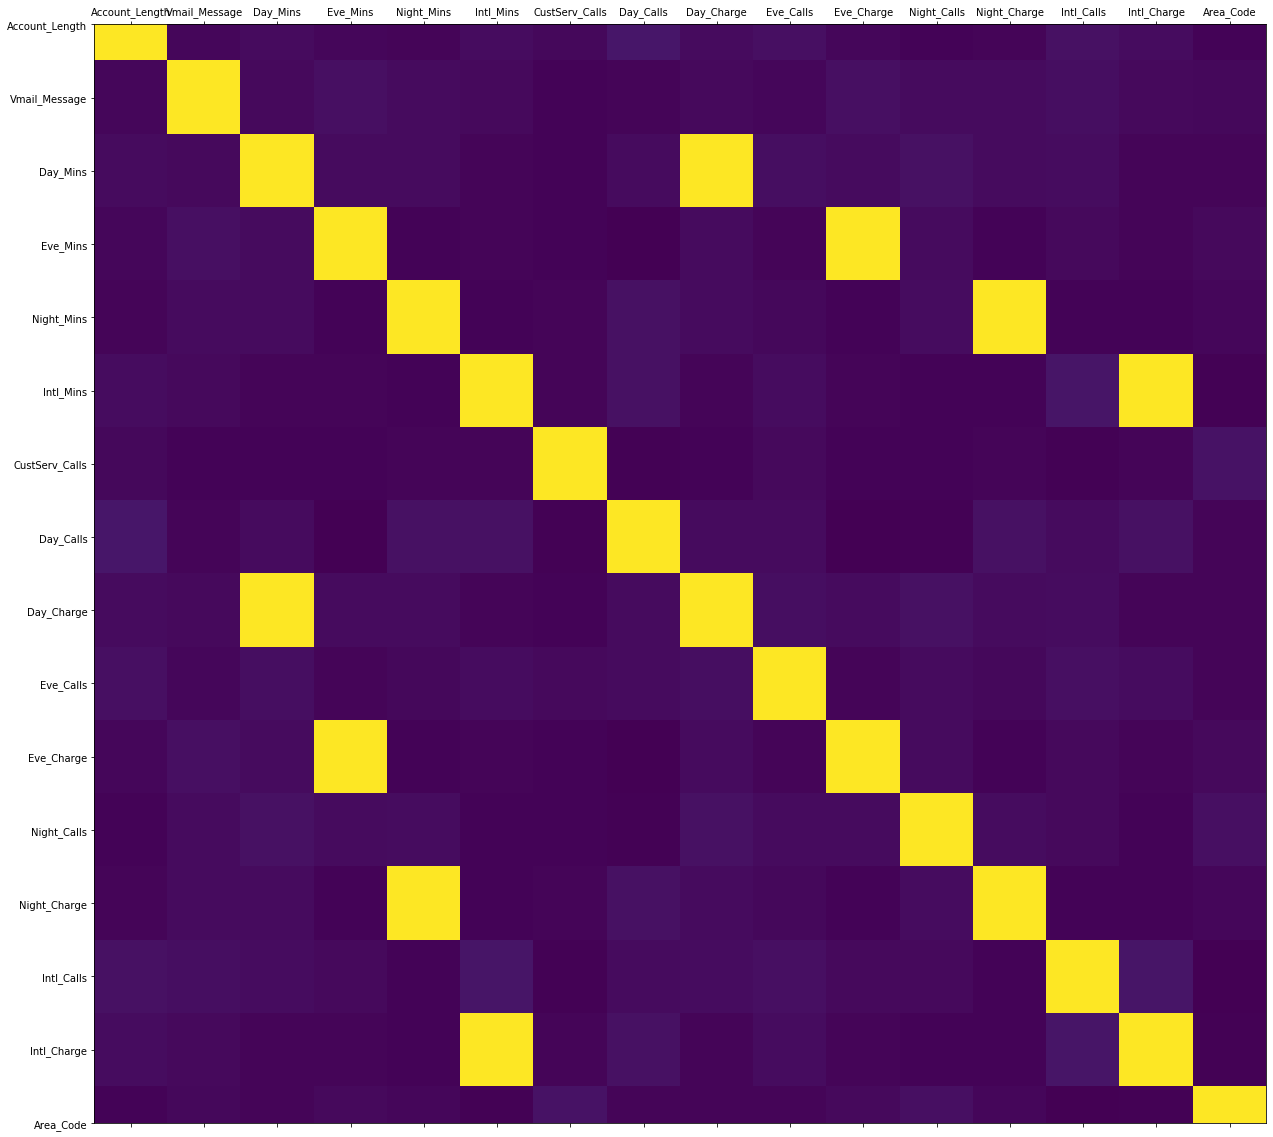

In [0]:
    correlacion = df_abandonos.corr() 
    fig, ax = plt.subplots(figsize=(21, 21)) 
    ax.matshow(correlacion) 
    plt.xticks(range(len(correlacion.columns)), correlacion.columns); 
    plt.yticks(range(len(correlacion.columns)), correlacion.columns); 

Es evidente que los cargos dependen de los minutos de conversación por lo que los pares de características x_calls x_Charge están muy correlacionadas entre sí

In [0]:

#Extraemos las etiquetas
resultado_abandono = df_abandonos['Churn']
y = np.where(resultado_abandono == 'yes',1,0)

# No necesitamos estas columnas
a_eliminar = ['State','Area_Code','Phone','Churn']
churn_feat_space = df_abandonos.drop(a_eliminar,axis=1)

yes_no_cols = ["Intl_Plan","Vmail_Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'




In [0]:
# Extrarmos características para su uso posterior

caracteristicas = churn_feat_space.columns

X = churn_feat_space.as_matrix().astype(np.float)

# Escalamos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print ("Disponemos de %d observaciones y %d características" % X.shape)
print ("Etiquetas objetivo únicas:", np.unique(y))


Disponemos de 3333 observaciones y 17 características
Etiquetas objetivo únicas: [0 1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [0]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.91


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[2109   22]
 [ 173  195]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2131
           1       0.90      0.53      0.67       368

    accuracy                           0.92      2499
   macro avg       0.91      0.76      0.81      2499
weighted avg       0.92      0.92      0.91      2499



In [0]:
pred_test = knn.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[707  12]
 [ 67  48]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       719
           1       0.80      0.42      0.55       115

    accuracy                           0.91       834
   macro avg       0.86      0.70      0.75       834
weighted avg       0.90      0.91      0.89       834

